In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## **파이썬 문자열 관련 함수 사용**
- os
- glob
- replace
- split
- join
- strip

In [2]:
train_paths = glob("E:\\dataset\\cifar\\train\\*.png")
test_paths = glob("E:\\dataset\\cifar\\test\\*.png")

In [3]:
len(train_paths), len(test_paths)

(50000, 10000)

In [4]:
path = train_paths[0]
path

'E:\\dataset\\cifar\\train\\0_frog.png'

In [5]:
fname = os.path.basename(path)
cls_name = fname.replace('.png', '').split('_')[1]
cls_name

'frog'

## **class 이름 얻은 것을 함수로 묶기**

In [6]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png', '').split('_')[1]
    return cls_name

In [7]:
cls_name = get_class_name(path)

In [8]:
path, cls_name

('E:\\dataset\\cifar\\train\\0_frog.png', 'frog')

# **Class 수 확인**

In [9]:
class_name = []

for path in train_paths:
    cls_name = get_class_name(path)
    class_name.append(cls_name)

In [10]:
class_names = [get_class_name(path) for path in train_paths]

In [11]:
len(class_names)

50000

In [12]:
uniques = np.unique(class_names, return_counts= True) #중복된것은 제거되고 출력

In [13]:
uniques

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

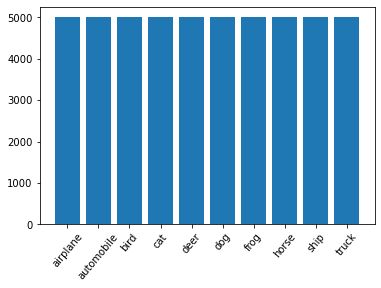

In [14]:
plt.bar(*uniques)
plt.xticks(rotation=50)
plt.show()

In [15]:
uniques[0]

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

# **DataFrame 생성**
파이썬에서 csv 또는 excel을 다룰 때 사용되는 library
주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룬다.
## **DataFrame 생성 방법**


In [16]:
data_ex = {'a':[1, 2, 3], 'b':[10, 20, 30], 'c': [100, 200, 300]}

In [17]:
df_ex = pd.DataFrame(data_ex)
df_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [18]:
train_paths[0], class_names[0]

('E:\\dataset\\cifar\\train\\0_frog.png', 'frog')

In [19]:
data = {'name': train_paths, 'class': class_names}

In [20]:
train_df = pd.DataFrame(data)

In [21]:
train_df.head()

,name,class
0,E:\dataset\cifar\train\0_frog.png,frog
1,E:\dataset\cifar\train\10000_automobile.png,automobile
2,E:\dataset\cifar\train\10001_frog.png,frog
3,E:\dataset\cifar\train\10002_frog.png,frog
4,E:\dataset\cifar\train\10003_ship.png,ship


In [22]:
test_names = [get_class_name(path) for path in test_paths]

In [23]:
test_data = {'name': test_paths, 'class': test_names}

In [24]:
test_df = pd.DataFrame(test_data)

In [25]:
test_df.head()

,name,class
0,E:\dataset\cifar\test\0_cat.png,cat
1,E:\dataset\cifar\test\1000_dog.png,dog
2,E:\dataset\cifar\test\1001_airplane.png,airplane
3,E:\dataset\cifar\test\1002_ship.png,ship
4,E:\dataset\cifar\test\1003_deer.png,deer


In [26]:
train_df.head()

,name,class
0,E:\dataset\cifar\train\0_frog.png,frog
1,E:\dataset\cifar\train\10000_automobile.png,automobile
2,E:\dataset\cifar\train\10001_frog.png,frog
3,E:\dataset\cifar\train\10002_frog.png,frog
4,E:\dataset\cifar\train\10003_ship.png,ship


# **만들어진 DataFrame 저장**

In [27]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [28]:
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

**index는 앞에 index가 csv 안에서 앞에 저장이 되지 않도록 하기 위함**

# **Data 확인**

In [29]:
from PIL import Image
from tqdm import tqdm_notebook

In [30]:
heights = []
widths = []

In [31]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(32, 32, 3)

In [32]:
for path in tqdm_notebook(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-32-c49f7430fed6>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(train_paths):


In [33]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))